# Mid Bootcamp Project | Case Study: Classification*


In [5]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('../mid-bootcamp-project-classification/creditcardmarketing.csv')

In [8]:
df.head(10)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0,1353.0
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0,115.0


In [9]:
df.shape

(18000, 17)

# Data Cleaning

In [11]:
df.isna().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [13]:
df.columns = [df.columns[col_name].lower().replace(' ','_').replace('#_','') for col_name in range(len(df.columns))]
df.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

In [14]:
df.set_index('customer_number', inplace=True)
df.head(10)

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
customer_number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0,1353.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18000 entries, 1 to 18000
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        18000 non-null  object 
 1   reward                18000 non-null  object 
 2   mailer_type           18000 non-null  object 
 3   income_level          18000 non-null  object 
 4   bank_accounts_open    18000 non-null  int64  
 5   overdraft_protection  18000 non-null  object 
 6   credit_rating         18000 non-null  object 
 7   credit_cards_held     18000 non-null  int64  
 8   homes_owned           18000 non-null  int64  
 9   household_size        18000 non-null  int64  
 10  own_your_home         18000 non-null  object 
 11  average_balance       17976 non-null  float64
 12  q1_balance            17976 non-null  float64
 13  q2_balance            17976 non-null  float64
 14  q3_balance            17976 non-null  float64
 15  q4_balance         

In [16]:
# Check the consistency of categorical values

for col in df.select_dtypes(np.object).columns:
    print("Unique entires for", col.upper(), "are:", df[col].unique())

Unique entires for OFFER_ACCEPTED are: ['No' 'Yes']
Unique entires for REWARD are: ['Air Miles' 'Cash Back' 'Points']
Unique entires for MAILER_TYPE are: ['Letter' 'Postcard']
Unique entires for INCOME_LEVEL are: ['High' 'Medium' 'Low']
Unique entires for OVERDRAFT_PROTECTION are: ['No' 'Yes']
Unique entires for CREDIT_RATING are: ['High' 'Medium' 'Low']
Unique entires for OWN_YOUR_HOME are: ['No' 'Yes']


# EDA

## Numerical variables

In [18]:
df.describe().round(2)

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.00,18000.0,18000.00,18000.00,17976.00,17976.00,17976.00,17976.00,17976.00
mean,1.26,1.9,1.20,3.50,940.52,910.45,999.39,1042.03,810.19
std,0.47,0.8,0.43,1.11,350.30,620.08,457.40,553.45,559.00
min,1.00,1.0,1.00,1.00,48.25,0.00,0.00,0.00,0.00
25%,1.00,1.0,1.00,3.00,787.50,392.75,663.00,633.00,363.00
50%,1.00,2.0,1.00,3.00,1007.00,772.00,1032.00,945.50,703.00
75%,1.00,2.0,1.00,4.00,1153.25,1521.00,1342.00,1463.00,1212.00
max,3.00,4.0,3.00,9.00,3366.25,3450.00,3421.00,3823.00,4215.00


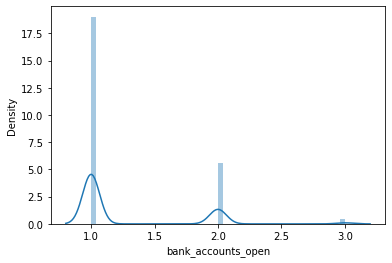

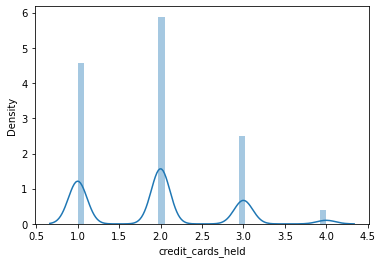

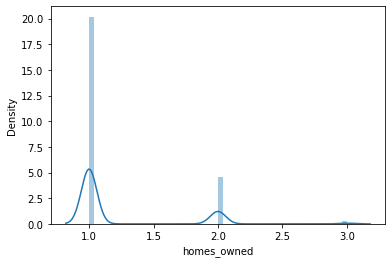

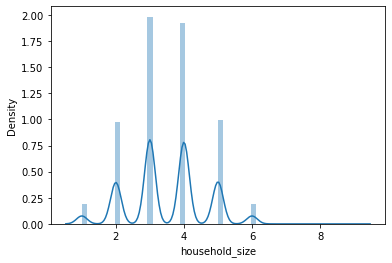

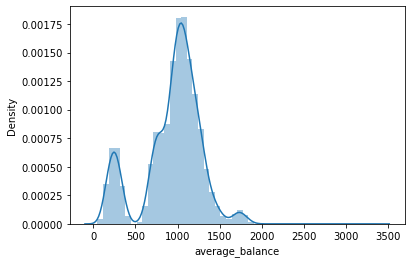

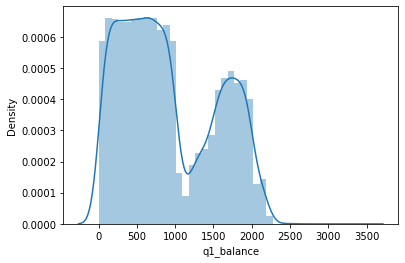

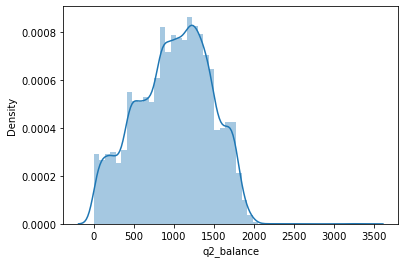

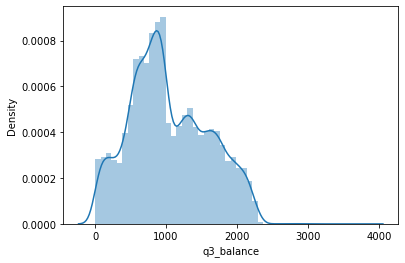

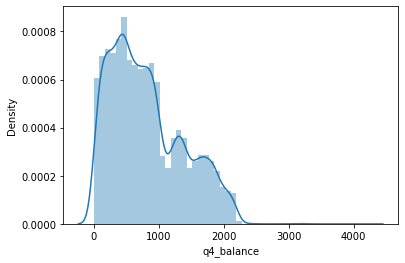

In [19]:
for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column])
    plt.show()

## Categorical data

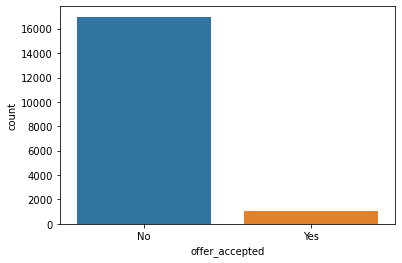

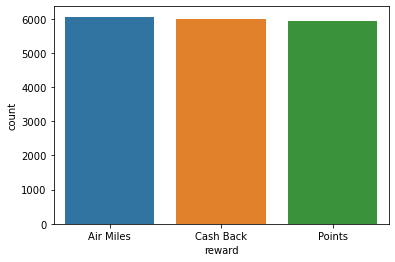

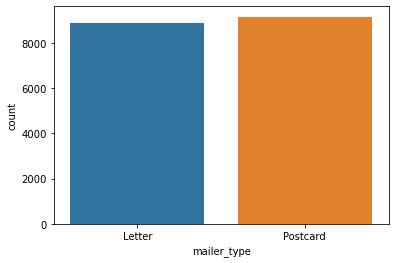

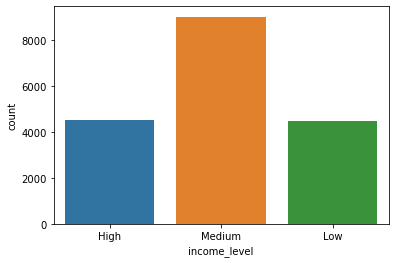

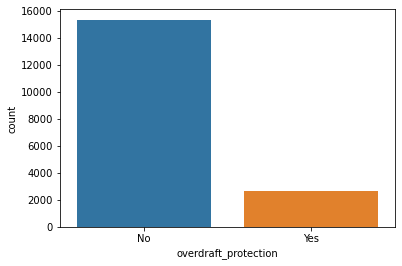

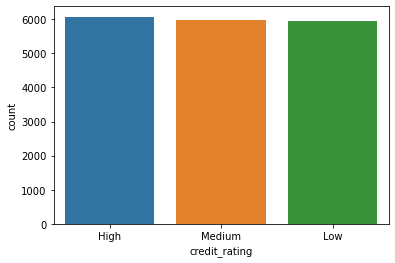

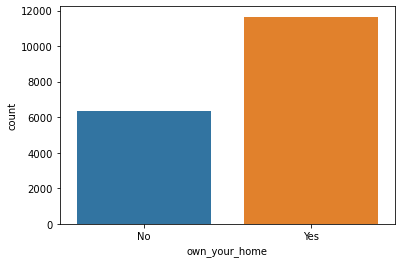

In [20]:
for col in df.select_dtypes(np.object).columns:
    sns.countplot(x=df[col]) #, hue=df['education']
    plt.show()

In [21]:
corr_mat = df.corr(method='spearman')
corr_mat

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
bank_accounts_open,1.000000,-0.004616,0.006206,0.007130,-0.005248,-0.003958,-0.011090,-0.000382,0.000332
credit_cards_held,-0.004616,1.000000,-0.000099,-0.003103,0.000790,-0.012297,-0.008478,-0.004966,0.011782
homes_owned,0.006206,-0.000099,1.000000,0.004573,0.021020,0.015796,0.010874,0.007531,0.008495
household_size,0.007130,-0.003103,0.004573,1.000000,0.000992,-0.005210,-0.006198,0.003824,-0.000456
average_balance,-0.005248,0.000790,0.021020,0.000992,1.000000,0.423116,0.722968,0.742163,0.560612
q1_balance,-0.003958,-0.012297,0.015796,-0.005210,0.423116,1.000000,0.459766,-0.020361,-0.182255
q2_balance,-0.011090,-0.008478,0.010874,-0.006198,0.722968,0.459766,1.000000,0.451610,0.143334
q3_balance,-0.000382,-0.004966,0.007531,0.003824,0.742163,-0.020361,0.451610,1.000000,0.625952
q4_balance,0.000332,0.011782,0.008495,-0.000456,0.560612,-0.182255,0.143334,0.625952,1.000000


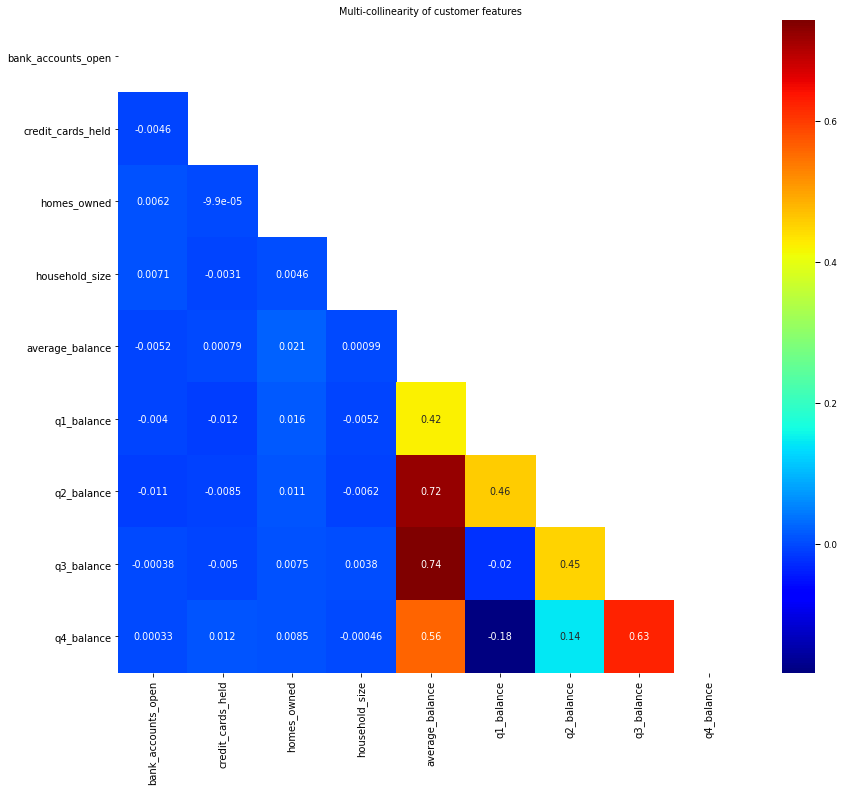

In [22]:
# Plot a correlation matrix to locate possible correlation right away

mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True # Mask to hide the repeated half of the matrix

fig, ax = plt.subplots(figsize=(14, 12)) # this will set the width and height of the plot
sns.set_context('paper') #This affects things like the size of the labels, lines, and other elements of the plot
ax = sns.heatmap(corr_mat, mask=mask, annot=True, cmap='jet') # Heatmap declaration
ax.set_title('Multi-collinearity of customer features') #Title for the graph
plt.show()
# plt.savefig('heatmap.png') 

# Data cleaning and wrangling

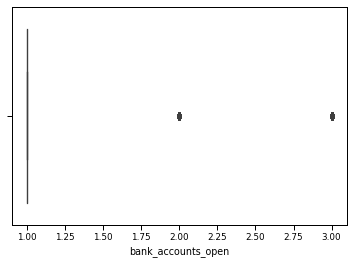

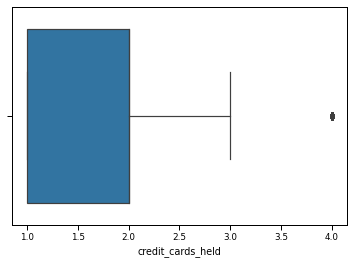

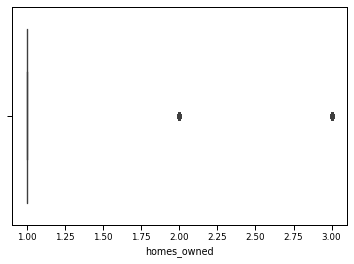

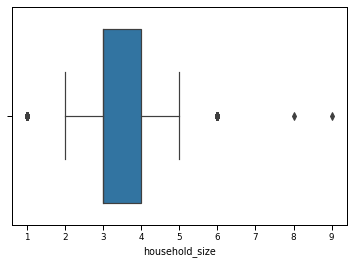

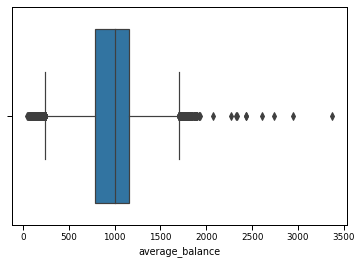

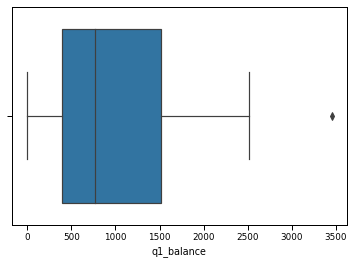

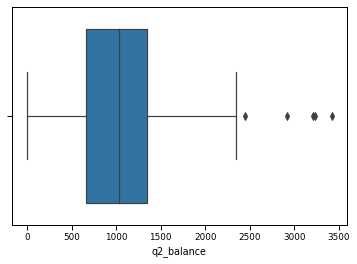

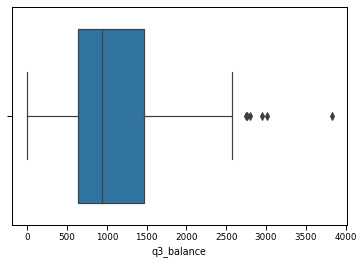

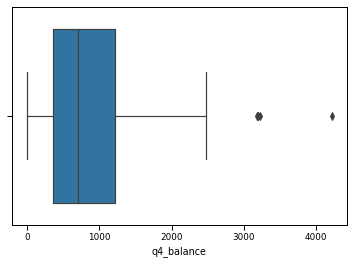

In [23]:
# Show outliers

for column in df.select_dtypes(include='number').columns:
    sns.boxplot(df[column])
    plt.show()

In [30]:
# Remove outliers

def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(include='number').columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>=lower_limit) & (df[column]<=upper_limit)]
    return df

In [23]:
for col in df1.select_dtypes(include='number').columns:
    print (col, np.percentile(df[col],75))

customer_lifetime_value 8962.16704125
income 62320.0
monthly_premium_auto 109.0
months_since_last_claim 23.0
months_since_policy_inception 71.0
number_of_open_complaints 0.0
number_of_policies 4.0
total_claim_amount 547.51483875


In [31]:
# Do not reduce your data too much, but play with the parameters, 
# so after a better analysis you can choose which columns to drop outliers from

print(len(df), "original columns")

df1 = df.copy()

df1 = remove_outliers(df1)

# df1 = remove_outliers(df1, skip_columns=['number_of_open_complaints'])

print(len(df1), "columns after removing outliers")

9134 original columns
5888 columns after removing outliers


In [21]:
df1.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [ ]:
# Filter outliers on the most important columns with a tighter threshold

print(len(df1), "original columns")

df2 = remove_outliers(df1, threshold=1.5, in_columns=['income', 'monthly_premium_auto', 'total_claim_amount'])
# now filter the outliers on the more important columns with a tighter threshold

print(len(df2), "columns after removing outliers")